## Project: Gaussian discriminant analysis, Naive bayes and Logistic regression implementation

In [3]:
import pandas as pd
import numpy as np
import numpy.linalg as m
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import seaborn as sns

In [26]:
data=pd.read_table('drugLibTest_raw.tsv')
data_=pd.read_table('drugLibTrain_raw.tsv')

### Data analysis

In [8]:
data.head(3)

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...


In [13]:
data.shape

(1036, 9)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 9 columns):
Unnamed: 0           1036 non-null int64
urlDrugName          1036 non-null object
rating               1036 non-null int64
effectiveness        1036 non-null object
sideEffects          1036 non-null object
condition            1036 non-null object
benefitsReview       1036 non-null object
sideEffectsReview    1036 non-null object
commentsReview       1036 non-null object
dtypes: int64(2), object(7)
memory usage: 72.9+ KB


In [10]:
data_.head(3)

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...


In [15]:
data_.shape

(3107, 9)

In [11]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
Unnamed: 0           3107 non-null int64
urlDrugName          3107 non-null object
rating               3107 non-null int64
effectiveness        3107 non-null object
sideEffects          3107 non-null object
condition            3106 non-null object
benefitsReview       3107 non-null object
sideEffectsReview    3105 non-null object
commentsReview       3099 non-null object
dtypes: int64(2), object(7)
memory usage: 218.5+ KB


#### Some observations on train data

Text(0.5, 1.0, 'The number of drugs per condition.')

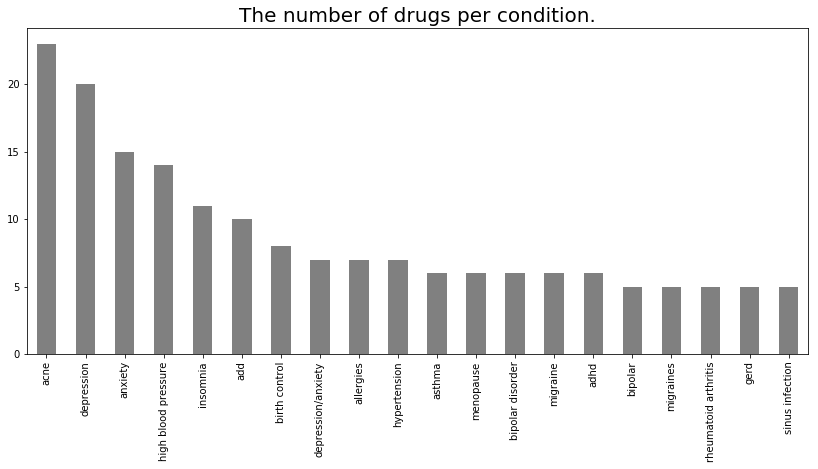

In [64]:
c = data.groupby(['condition'])['urlDrugName'].nunique().sort_values(ascending=False)
c[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color='gray')
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("The number of drugs per condition.", fontsize = 20)

Text(0.5, 1.0, 'The number of drugs per condition.')

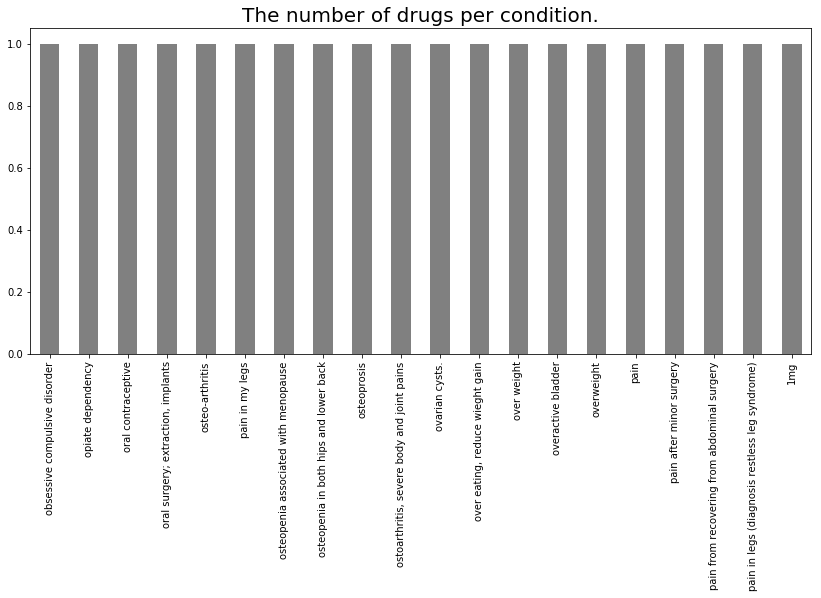

In [65]:
c = data.groupby(['condition'])['urlDrugName'].nunique().sort_values(ascending=False)

c[c.shape[0]-20:c.shape[0]].plot(kind="bar", figsize = (14,6), fontsize = 10,color='gray')
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("The number of drugs per condition.", fontsize = 20)

Text(0.5, 1.0, 'Count of rating values')

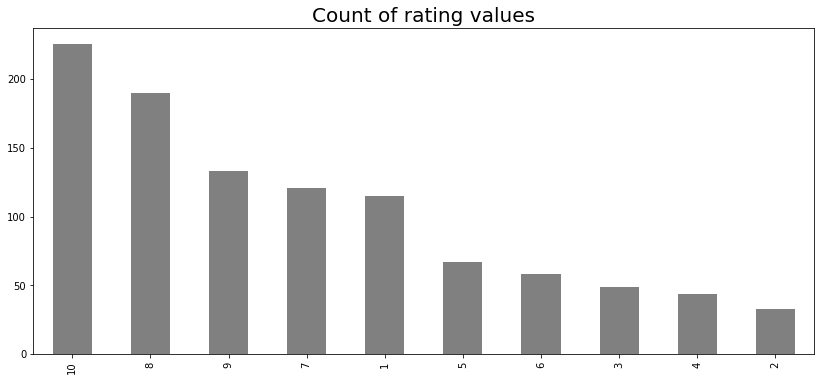

In [57]:
target = data['rating'].value_counts().sort_values(ascending=False)
target.plot(kind="bar", figsize = (14,6), fontsize = 10,color='gray')
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Count of rating values", fontsize = 20)

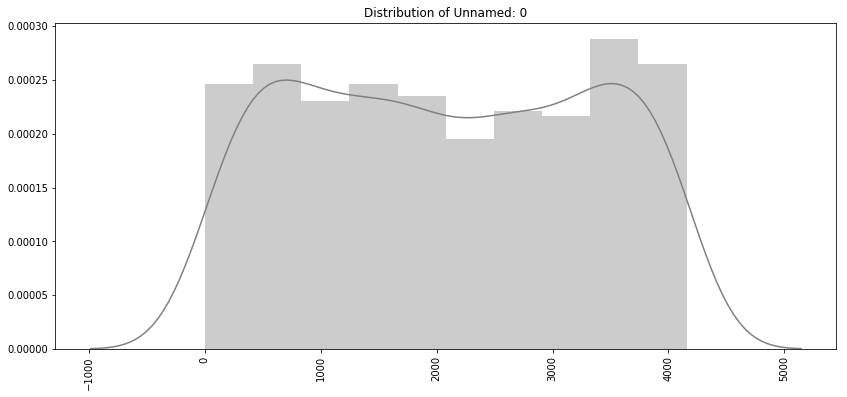

In [62]:
plt.figure(figsize=(14,6))
sns.distplot(data["Unnamed: 0"].dropna(),color='gray')
plt.xticks(rotation='vertical')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title("Distribution of Unnamed: 0")
plt.show()

#### Missing values

Text(0.5, 1.0, 'Total Missing Value ')

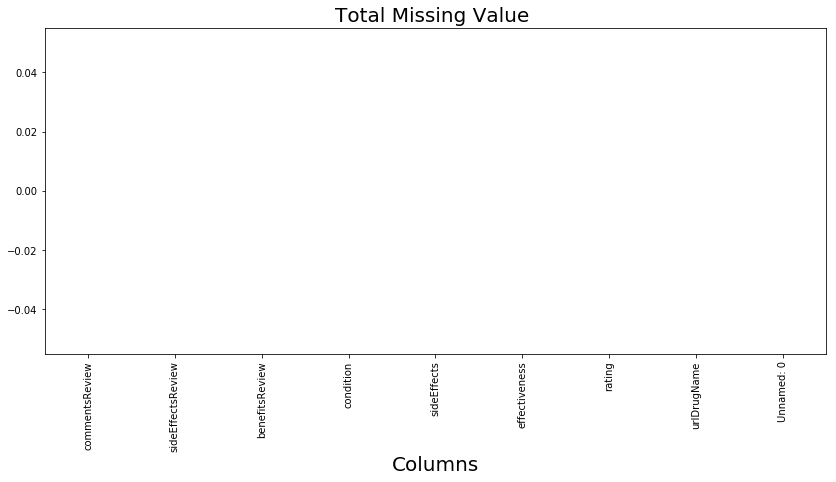

In [47]:
percentage = (data.isnull().sum()).sort_values(ascending=False)
percentage.plot(kind="bar", figsize = (14,6), fontsize = 10)
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

In [35]:
print("Missing value (%):", 0.04/data.shape[0] *100)

Missing value (%): 0.003861003861003861


#### Some observations on test data

Text(0.5, 1.0, 'The number of drugs per condition.')

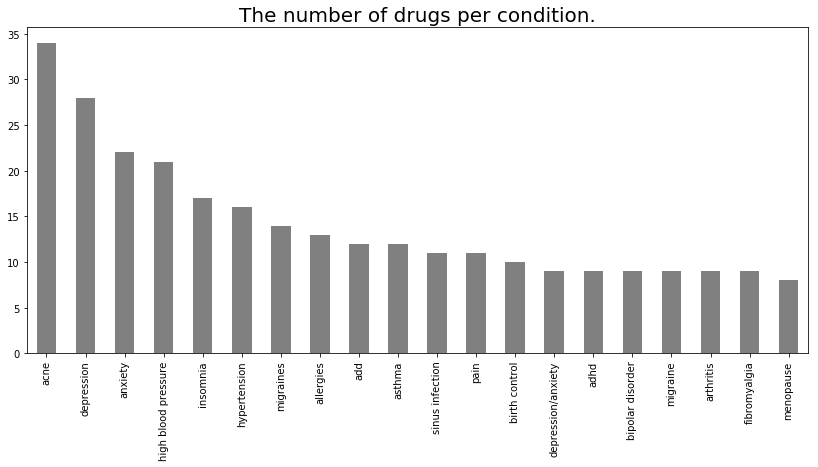

In [66]:
c = data_.groupby(['condition'])['urlDrugName'].nunique().sort_values(ascending=False)
c[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color='gray')
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("The number of drugs per condition.", fontsize = 20)

Text(0.5, 1.0, 'The number of drugs per condition.')

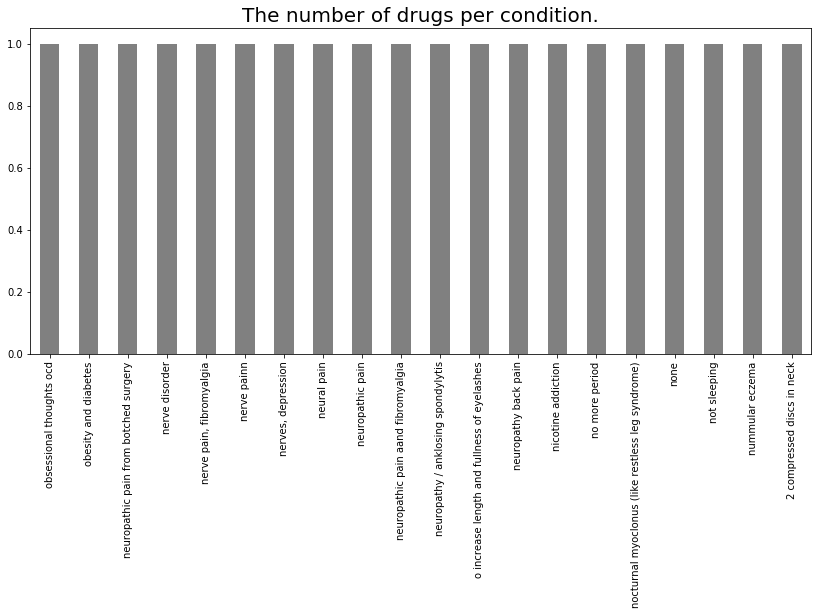

In [67]:
c = data_.groupby(['condition'])['urlDrugName'].nunique().sort_values(ascending=False)

c[c.shape[0]-20:c.shape[0]].plot(kind="bar", figsize = (14,6), fontsize = 10,color='gray')
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("The number of drugs per condition.", fontsize = 20)

Text(0.5, 1.0, 'Count of rating values')

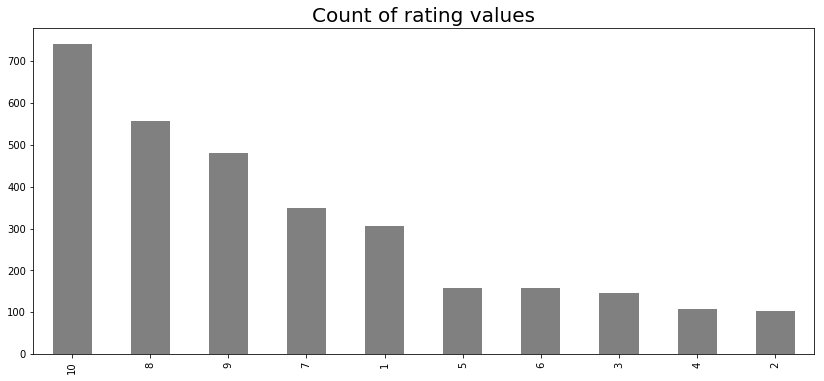

In [60]:
target = data_['rating'].value_counts().sort_values(ascending=False)
target.plot(kind="bar", figsize = (14,6), fontsize = 10,color='gray')
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Count of rating values", fontsize = 20)

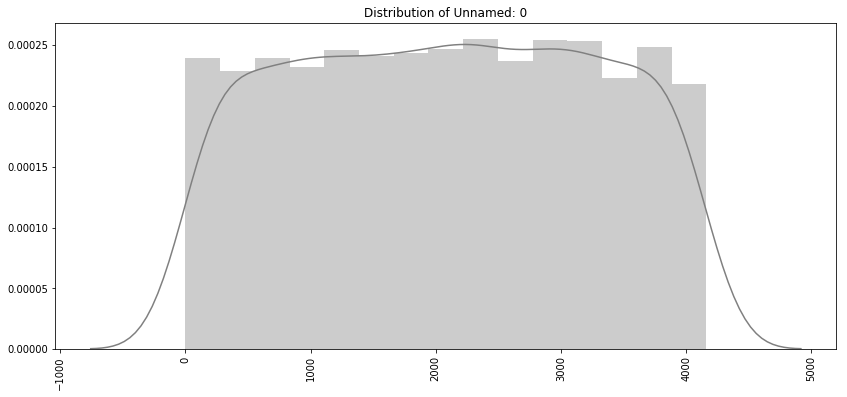

In [63]:
plt.figure(figsize=(14,6))
sns.distplot(data_["Unnamed: 0"].dropna(),color='gray')
plt.xticks(rotation='vertical')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title("Distribution of Unnamed: 0")
plt.show()

#### Missing values

Text(0.5, 1.0, 'Total Missing Value ')

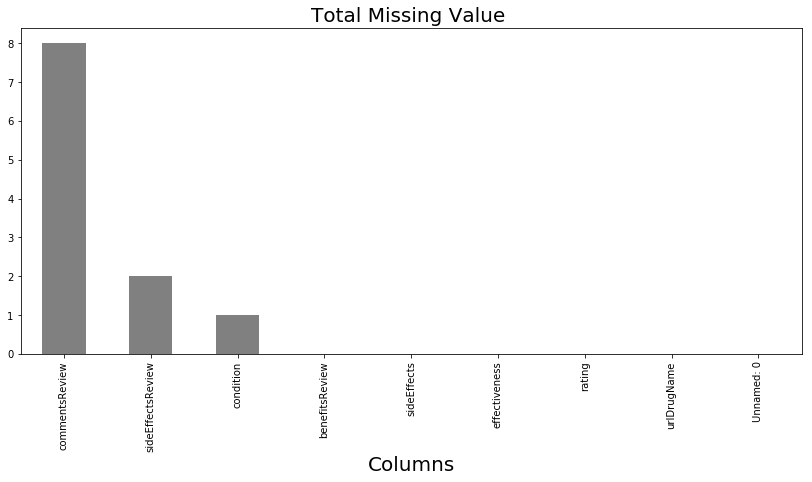

In [61]:
percentage = (data_.isnull().sum()).sort_values(ascending=False)
percentage.plot(kind="bar", figsize = (14,6), fontsize = 10,color='gray')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

In [53]:
print("Missing value (%):", 8/data_.shape[0] *100)

Missing value (%): 0.2574831026713872


### Conversion of features to binary numbers

In [5]:
y = 1*(data['rating']>5)
y = y.values
df = data.drop(['Unnamed: 0','rating'],axis=1)

def tovec(text):
    # create the transform
    vectorizer = CountVectorizer(binary=True,stop_words='english',max_features=90)
    # tokenize and build vocab
    vectorizer.fit(text)
    # summarize
    k = vectorizer.vocabulary_
    # encode document
    vector = vectorizer.transform(text)
    # summarize encoded vector
    return vector.toarray()
data_new=df['urlDrugName']+' '+df['effectiveness']+' '+df['sideEffects']+' '+df['condition']+' '+df['benefitsReview']+' '+df['sideEffectsReview']+' '+df['commentsReview']
X = tovec(data_new)
df_features = pd.DataFrame(X)

In [6]:
df_features.head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


# Algorithms implementation

### Linear discriminant analysis class

In [7]:
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

def calculate_covariance_matrix(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])


class Linear_Discriminant_Analysis():
    
    def __init__(self):
        self.w = None

    def transform(self, X, y):
        self.fit(X, y)
        # Project data onto vector
        X_transform = X.dot(self.w)
        return X_transform

    def fit(self, X, y):
        # Separate data by class
        X1 = X[y == 0]
        X2 = X[y == 1]

        # Calculate the covariance matrices of the two datasets
        cov1 = calculate_covariance_matrix(X1)
        cov2 = calculate_covariance_matrix(X2)
        cov_tot = cov1 + cov2

        # Calculate the mean of the two datasets
        mean1 = X1.mean(0)
        mean2 = X2.mean(0)
        mean_diff = np.atleast_1d(mean1 - mean2) #convert to an array to 1D at least

        # Determine the vector which when X is projected onto it best separates the
        # data by class. w = (mean1 - mean2) / (cov1 + cov2)
        self.w = np.linalg.pinv(cov_tot).dot(mean_diff)

    def predict(self, X):
        y_pred = []
        for sample in X:
            h = sample.dot(self.w)
            y = 1 * (h < 0)
            y_pred.append(y)
        return y_pred
    
    def accuracy(self,X,y):
        y_pred = self.predict(X)
        accu=np.sum(y_pred == y)/len(y)
        return accu

### Test of Linear discriminant analysis on iris

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

data=datasets.load_iris()
x1=data.data[:,:2]
y1=(data.target!=0)*1

In [9]:
np.unique(y_train)

array([0, 1])

In [10]:
model=Linear_Discriminant_Analysis()

In [11]:
model.fit(x1,y1)

In [12]:
predictions=model.predict(x1)

In [13]:
model.accuracy(x1,y1)

0.6666666666666666

### Gaussian discriminant analysis implementation

In [14]:
class MGaussian_Discriminant_Analysis(object):
    def __init__(self,train_data,train_label):
        self.train_data = train_data
        self.train_label = train_label
        
    def calculate_phi(self):
        m = len(self.train_label)
        return sum((self.train_label==1))/m
    
    def calculate_mu0(self):
        m = len(self.train_label)
        y_neg = np.sum(self.train_data*(self.train_label==0).reshape(-1,1),axis=0)/len(self.train_label==0)
        return y_neg.reshape(1,-1)
        
    def calculate_mu1(self):
        m = len(self.train_label)
        y_neg = np.sum(self.train_data*(self.train_label==1).reshape(-1,1),axis=0)/len(self.train_label==1)
        return y_neg.reshape(1,-1)
    
     
    def sigma(self):
        m = len(self.train_label)
        n_x = self.train_data[self.train_label==0] - self.calculate_mu0()
        p_x = self.train_data[self.train_label==1] - self.calculate_mu1()
        y_neg = ((n_x.T).dot(n_x) + (p_x.T).dot(p_x))/self.train_data.shape[0]
        return y_neg
    
    def Gaussian(self,z,m):
        t =np.dot(np.linalg.inv(self.sigma()),(z.reshape(1,-1) - m).T)
        t1=np.dot((z.reshape(1,-1) - m),t)
        G=(1/(2*np.pi)*np.linalg.det(self.sigma()))* np.exp(-0.5 *t1)
        return G
    
    def prob(self):
        inv_sigma = np.linalg.inv(self.sigma())
        b = (self.calculate_mu1().T).dot(inv_sigma).dot(self.calculate_mu1()) - (self.calculate_mu0().T).dot(inv_sigma).dot(self.calculate_mu0()) + np.log(self.calculate_phi()) - np.log(1-self.calculate_phi())
        return b
    
    def prediction(self,z):
        m0=self.calculate_mu0()
        m1=self.calculate_mu1()
        phi=self.calculate_phi()
        p=np.zeros(len(z))      
        for i in range(len(z)):
            prob0=self.Gaussian(z[i],m0)*(1-phi)
            prob1=self.Gaussian(z[i],m1)*phi
            p[i]=np.argmax([prob0,prob1])
        return p 
    
    def accuracy(self,X,y):
        y_pred = self.prediction(X)
        accu=np.sum(y_pred == y)/len(y)
        return accu    

### Test of Gaussian discriminant analysis on our data

In [15]:
mga = MGaussian_Discriminant_Analysis(X_train,y_train)

#### Calculus of function Phi 

In [16]:
mga.calculate_phi()

0.7104247104247104

#### Calculus of function mu0

In [17]:
mga.calculate_mu0()

array([[0.02895753, 0.01930502, 0.01930502, 0.03474903, 0.03281853,
        0.03088803, 0.04054054, 0.05405405, 0.03474903, 0.04440154,
        0.02702703, 0.04633205, 0.14092664, 0.08301158, 0.05019305,
        0.1003861 , 0.03281853, 0.06756757, 0.03088803, 0.05019305,
        0.09266409, 0.04247104, 0.03667954, 0.22586873, 0.28957529,
        0.01544402, 0.02895753, 0.08494208, 0.05212355, 0.02702703,
        0.05984556, 0.01930502, 0.03861004, 0.03474903, 0.03281853,
        0.02895753, 0.02123552, 0.03667954, 0.02123552, 0.03474903,
        0.07528958, 0.04247104, 0.02316602, 0.07335907, 0.02509653,
        0.03474903, 0.07335907, 0.02123552, 0.04633205, 0.05405405,
        0.09266409, 0.07528958, 0.02123552, 0.05405405, 0.03088803,
        0.02702703, 0.03281853, 0.04440154, 0.02702703, 0.02316602,
        0.08108108, 0.03861004, 0.04826255, 0.02509653, 0.01930502,
        0.16409266, 0.03861004, 0.03088803, 0.04826255, 0.03088803,
        0.03474903, 0.05791506, 0.04247104, 0.03

#### Calculus of function mu1

In [18]:
mga.calculate_mu1()

array([[0.06756757, 0.11583012, 0.06949807, 0.09266409, 0.07142857,
        0.03088803, 0.05984556, 0.10617761, 0.07915058, 0.25289575,
        0.07722008, 0.12162162, 0.29150579, 0.14285714, 0.12934363,
        0.16602317, 0.05984556, 0.14092664, 0.08301158, 0.13127413,
        0.16023166, 0.0965251 , 0.09459459, 0.70656371, 0.71042471,
        0.05598456, 0.04054054, 0.04247104, 0.13899614, 0.07915058,
        0.08494208, 0.05405405, 0.05598456, 0.08108108, 0.06177606,
        0.07335907, 0.07722008, 0.38803089, 0.0965251 , 0.08301158,
        0.00772201, 0.08687259, 0.09073359, 0.12548263, 0.05984556,
        0.08494208, 0.16216216, 0.07722008, 0.14092664, 0.33011583,
        0.16216216, 0.07142857, 0.08880309, 0.14864865, 0.13127413,
        0.05984556, 0.05791506, 0.14478764, 0.05791506, 0.06949807,
        0.09459459, 0.09266409, 0.0965251 , 0.06563707, 0.08880309,
        0.1042471 , 0.12355212, 0.12934363, 0.14864865, 0.05791506,
        0.04054054, 0.07528958, 0.1003861 , 0.10

#### Prediction of Gaussian discriminant on our data

In [19]:
mga.prediction(X_test)

array([1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1.

#### Accuracy of Gaussian discriminant analysis on our data

In [20]:
mga.accuracy(X_test,y_test)

0.832046332046332

### Naive bayes implementation

In [21]:
class Naive_bayes:
    def __init__(self,X,y):
        self.X = X
        self.y = y
    def fit(self):
        data = self.X
        target = self.y
        x_1y_0=[]
        x_1y_1=[]
        y_new=[]
        count_3=0
        count_4=0
        for j in range(data.shape[1]):
            count=0
            count_2=0
            for i in range(data.shape[0]):
#                 print(data,target,i,j)
                if y[i]==0 and data[i][j]==1:
                    count +=1
                if y[i]==1 and data[i][j]==1:
                    count_2 +=1
                if j==0 and y[i]==1:
                    count_3+=1
                if j==0 and y[i]==0:
                    count_4+=1
            length_1=count_3
            length_0=count_4
            x_1y_0.append(count/length_0)
            x_1y_1.append(count_2/length_1)
        y_new.append(count_3/(length_0+length_1))
        return x_1y_0,x_1y_1,y_new

    def Bernouilli(self,x,phi):
        return (phi**x)*(1-phi)**(1-x)

    def predict(self,x):
        phi_x1_y0,phi_x1_y1,p = self.fit()
        pred = np.zeros(x.shape[0])
        for i in range(len(x)):
            prb1 = 1
            prb2 = 1
            for j in range(x.shape[1]):
                prb1*= self.Bernouilli(x[i,j],phi_x1_y0[j])
                prb2*= self.Bernouilli(x[i,j],phi_x1_y1[j])
            prb1 = prb1*(1-p[0])
            prb2 = prb2*(p[0])
            pred[i] = np.argmax([prb1,prb2])
        return pred

    def accuracy(self,test,pred):
        c=0
        for i in range(len(pred)):
            if(test[i]==pred[i]):
                c+=1
        c=c/len(pred)
        return c

### Test of Naive bayes on our data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

In [23]:
model=Naive_bayes(X_train,y_train)

In [24]:
model.fit()

([0.08928571428571429,
  0.16666666666666666,
  0.10714285714285714,
  0.1488095238095238,
  0.125,
  0.05952380952380952,
  0.11904761904761904,
  0.15476190476190477,
  0.07142857142857142,
  0.32142857142857145,
  0.08928571428571429,
  0.16666666666666666,
  0.43452380952380953,
  0.23214285714285715,
  0.2619047619047619,
  0.27976190476190477,
  0.08928571428571429,
  0.16666666666666666,
  0.1130952380952381,
  0.20238095238095238,
  0.25,
  0.125,
  0.1130952380952381,
  0.9226190476190477,
  1.0,
  0.05952380952380952,
  0.05357142857142857,
  0.15476190476190477,
  0.23809523809523808,
  0.14285714285714285,
  0.16071428571428573,
  0.06547619047619048,
  0.08928571428571429,
  0.07738095238095238,
  0.1130952380952381,
  0.1130952380952381,
  0.05952380952380952,
  0.35714285714285715,
  0.08928571428571429,
  0.1130952380952381,
  0.09523809523809523,
  0.16071428571428573,
  0.10119047619047619,
  0.21428571428571427,
  0.10714285714285714,
  0.13690476190476192,
  0.22619

#### Prediction of Naive bayes on our data

In [25]:
predictions = model.predict(X_test)

In [26]:
accuracy = model.accuracy(y_test,predictions)

#### Accuracy of Naive bayes on our data

In [27]:
print('The accuracy is: ',accuracy)

The accuracy is:  0.693050193050193


### Split and test on 60% 40% of the data

In [28]:
order = np.random.permutation(len(X))
portion = 40
# Split your data into train and test using the order and permutation variable
train_x = X[order[portion:]]
train_y = y[order[portion:]]

test_x= X[order[:portion]]
test_y= y[order[:portion]]

In [29]:
model=Naive_bayes(train_x,train_y)

In [30]:
model.fit()

([0.07407407407407407,
  0.1447811447811448,
  0.07407407407407407,
  0.13468013468013468,
  0.08417508417508418,
  0.08754208754208755,
  0.11447811447811448,
  0.19865319865319866,
  0.12457912457912458,
  0.29292929292929293,
  0.08754208754208755,
  0.1750841750841751,
  0.4713804713804714,
  0.23232323232323232,
  0.18518518518518517,
  0.30976430976430974,
  0.12457912457912458,
  0.20875420875420875,
  0.11784511784511785,
  0.15488215488215487,
  0.2962962962962963,
  0.1447811447811448,
  0.14814814814814814,
  0.9090909090909091,
  1.0,
  0.09090909090909091,
  0.10437710437710437,
  0.15488215488215487,
  0.1919191919191919,
  0.1111111111111111,
  0.17845117845117844,
  0.10437710437710437,
  0.08754208754208755,
  0.13131313131313133,
  0.08754208754208755,
  0.10774410774410774,
  0.09764309764309764,
  0.41414141414141414,
  0.10437710437710437,
  0.10774410774410774,
  0.10437710437710437,
  0.1919191919191919,
  0.11447811447811448,
  0.20202020202020202,
  0.080808080

#### Prediction

In [31]:
predictions = model.predict(X_test)

In [32]:
accuracy = model.accuracy(y_test,predictions)

#### Accuracy 

In [33]:
print('The accuracy is: ',accuracy)

The accuracy is:  0.7007722007722008


### Logistic regression implementation

In [40]:
class LogisticRegression():
    def __init__(self,lr,n_iters,weight,x,y):
        self.lr = lr
        self.n_iters = n_iters
        self.weight = weight
        self.x = x
        self.y = y
        
    def Sigmoid(self,z):
        sign = 1 / (1+np.exp(-z))
        return sign
    
    def Cost(self):
        yhat= self.x@self.weight
        cost = ((-self.y.T) @ np.log2(self.Sigmoid(yhat))) - ((1 - self.y).T @ np.log2(1 - self.Sigmoid(yhat)))
        #print(yhat.shape)
        return cost
    
    def Gradient(self):
        yhat= self.x@self.weight
        return self.x.T @ ((self.y) - self.Sigmoid(yhat))
    
    def fit(self):
        loss = np.zeros((self.n_iters))
        for i in range(self.n_iters):
            self.weight = self.weight + (self.lr * self.Gradient())
            
            loss[i] = self.Cost()
            
        return self.weight#, loss
    
    
    def pred_prob(self,z):
            return self.Sigmoid(np.dot(z,self.weight))
    
    def predict(self,prediction):
    
         liste = []

         for elt in prediction:
                if elt<0.5:
                    liste.append(0)
                else:
                    liste.append(1)
                liste = np.array(liste)
                liste = liste.reshape(-1,1)
                return liste
    
    def hessian(self):
        yhat = self.x@self.weight
        omega = self.Sigmoid(yhat) @ (1 - self.Sigmoid(yhat)).T
        return ((-x.T) @ omega)@x -2.44641553e+05, LA.eigvals(((-x.T) @ omega)@x)

    def Newton(self):
        for i in range(self.n_iters):
            self.weight = self.weight - inv(self.hessian()[0])@self.Gradient()
        return self.weight
    
    def Good_pred(self,z):
        
        yhat=np.dot(z,self.fit())
        
        return np.where(self.Sigmoid(yhat)>0.05,1,0)
    
    
    def accuracy(self,z,y1):
        y1=y1.reshape(-1,1)
        acc = y1==self.Good_pred(z)
        return np.sum(acc)/len(y1)
        
def Sigmoid(x):
    sign = 1 / (1+np.exp(-x))
    return sign

def Good_pred(z, weight):
        
        yhat=z@weight
        
        return np.where(Sigmoid(yhat)>0.5,1,0)        

### Test of Logistic regression

In [35]:
data1=datasets.load_iris()
x2=data1.data[:,:2]
y2=(data1.target!=0)*1
y2=y2.reshape(-1,1)
theta = np.zeros((x2.shape[1],1))  

In [36]:
model=LogisticRegression(0.01,10000,theta,x2,y2)

In [37]:
result=model.fit()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in matmul
  from ipykernel import kernelapp as app


### Test logistic regression on our dataset

In [41]:
theta1 = np.zeros((X_train.shape[1],1))
model2=LogisticRegression(0.1,100,theta1,X_train,y_train.reshape(-1,1))

In [42]:
result=model2.Good_pred(X_test)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in matmul
  from ipykernel import kernelapp as app


In [43]:
model2.fit()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in matmul
  from ipykernel import kernelapp as app


array([[-4.13728187e-01],
       [ 8.95565173e+00],
       [ 3.99977892e-01],
       [ 9.44353411e+00],
       [-9.79067136e+00],
       [-8.81137859e+00],
       [ 2.27416829e+00],
       [-1.30271033e+00],
       [-2.93128669e+00],
       [ 4.01787419e+01],
       [-7.82058603e+00],
       [-5.88303151e-02],
       [-4.68295819e+00],
       [-9.24742582e+00],
       [-2.41427077e-01],
       [-7.33317166e+00],
       [-4.41033102e+00],
       [-1.39375502e+00],
       [-4.66828769e-01],
       [-2.02752601e+00],
       [-1.60333174e+00],
       [-3.83152016e+00],
       [-4.11071108e+00],
       [-4.03198666e+00],
       [-9.62573489e+00],
       [ 9.06696993e+00],
       [-4.69771580e+00],
       [-1.69193678e+01],
       [-2.12579798e+00],
       [ 1.35374155e+01],
       [ 2.45362230e-01],
       [-7.18950905e-02],
       [-9.73541849e-01],
       [ 8.30367132e+00],
       [ 2.11440158e-02],
       [ 1.75120538e+00],
       [ 1.41760812e+01],
       [ 4.28056433e+01],
       [ 1.6

#### Accuracy

In [44]:
model2.accuracy(X_test,y_test)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in matmul
  from ipykernel import kernelapp as app


0.8552123552123552

### Re-upload data to run for multiclass

In [61]:
data=pd.read_table('drugLibTest_raw.tsv')
data_=pd.read_table('drugLibTrain_raw.tsv')

In [62]:
data.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 9 columns):
Unnamed: 0           1036 non-null int64
urlDrugName          1036 non-null object
rating               1036 non-null int64
effectiveness        1036 non-null object
sideEffects          1036 non-null object
condition            1036 non-null object
benefitsReview       1036 non-null object
sideEffectsReview    1036 non-null object
commentsReview       1036 non-null object
dtypes: int64(2), object(7)
memory usage: 72.9+ KB


In [64]:
y=data['rating']
y = y.values
df = data.drop(['Unnamed: 0','rating'],axis=1)

def tovec(text):
    # create the transform
    vectorizer = CountVectorizer(binary=True,stop_words='english',max_features=90)
    # tokenize and build vocab
    vectorizer.fit(text)
    # summarize
    k = vectorizer.vocabulary_
    # encode document
    vector = vectorizer.transform(text)
    # summarize encoded vector
    return vector.toarray()
data_new=df['urlDrugName']+' '+df['effectiveness']+' '+df['sideEffects']+' '+df['condition']+' '+df['benefitsReview']+' '+df['sideEffectsReview']+' '+df['commentsReview']
X = tovec(data_new)
df_features = pd.DataFrame(X)

In [65]:
df_features

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

### Gaussian Discriminant Analysis Multiclass

In [69]:
class GDA():
    def __init__(self):
        self.__phi = None
        self.__means = None
        self.__sigma = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.__classes = np.unique(y)
        n_classes = len(self.__classes)
        
        self.__phi = np.zeros((n_classes, 1))
        self.__means = np.zeros((n_classes, n_features))
        self.__sigma = 0
        for i in range(n_classes):
            indexes = np.flatnonzero(y == self.__classes[i])

            self.__phi[i] = len(indexes) / n_samples
            self.__means[i] = np.mean(X[indexes], axis=0)
            self.__sigma += np.cov(X[indexes].shape) * (len(indexes) - 1)
            

            self.__sigma /= n_samples
                    
    def calculate_px_py(self,X,u,sigma):
        n = X.shape[0]
        pi = 3.14
        x1=1/((2*np.pi)**(n/2)*np.linalg.det(np.abs(sigma)))
        D=np.matrix(X-u)
        x2=np.exp(-np.dot(np.matmul(D,np.linalg.inv(sigma)),D))[1]
        return x1*x2     
    
    def calculate_py(self,y):
        return np.where(y==1,self.__phi,1-self.__phi)                              
        
    def predict(self, X):
        
        pdf = lambda mean: multivariate_normal.pdf(X, mean=mean, cov=self.__sigma)
        y_probs = np.apply_along_axis(pdf, 1, self.__means) * self.__phi

        return self.__classes[np.argmax(y_probs, axis=0)]
    
    def accuracy(self,X,y):
        y_pred = self.predict(X)
        accu=np.sum(y_pred == y)/len(y)
        return accu


In [70]:
model = GDA()

In [71]:
model.fit(X_train, y_train)

In [72]:
predictions=model.predict(X_test)

In [73]:
predictions

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10

In [74]:
model.accuracy(X_test,y_test)

0.2084942084942085

### Feature selection

In [ ]:
def forward_feature_selection(X, y, n_features=2):
    results = {'best':[]}
    count = 0
    feature_list = []
    while len(feature_list) < n_features:
        results[count] = []
        for i in range(len(X[0])):
            if i not in feature_list: 
                train_model_save_result(X, y, results[count])
        best_result = get_best_result(results[count])
        feature_list = best_result['features']
        results['best'].append(best_result)
        count+= 1
    compute_best_features(results, n_features)
    return results

def backward_feature_selection(X, y, n_features=2):
    results = {'best':[]}
    count = 0
    feature_list = range(len(X[0]))
    while len(feature_list) > 1:
        results[count] = []
        for i in range(len(feature_list)):
            idx = feature_list[0:i] + feature_list[i+1:]
            train_model_save_result(X, y, idx, results[count])
        best_result = get_best_result(results[count])
        feature_list = best_result['features']
        results['best'].append(best_result)
        count+= 1
    compute_best_features(results, n_features)
    return results

def compute_best_features(results, n_features):
    best_result = None
    for result in results['best']:
        if len(result['features']) <= n_features:
            if not best_result: 
                best_result = result
            elif best_result['score'] < result['score']: 
                best_result = result
    results['best_features'] = best_result['features']
    
def train_model_save_result(X, y, result_storage):
    #X_ = X[:, idx]
    result = 0
    model = Naive_bayes(X,y)
    model.fit()
    acc = accuracy(y, model.predict(X))
    result += acc
    print({'accuracy ' :acc})
    result_storage.append({'score': result})
    
def get_best_result(result_storage):
    best = None
    for model in result_storage:
        if not best: best = model
        elif model['score'] > best['score']:best = model
    return best

# Report

## The goal of this project was to compare Gaussian discriminant analysis, Naive bayes and Logistic regression algorithms in term of performence. By observing the different accuracy of Gaussian discriminant analysis, Naive bayes and Logistic regression we can say that the Logistic regression model is better to use on this data than the Gaussian discriminant analysis and Naive bayes in case of binary classification. But for multiclass the Naive bayes algorithm perform very well than others (Gaussian discriminant analysis and Logistic regression) 

## Thank you!